## 使用Requests 抓取文字 (GET)

In [1]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')
res

<Response [200]>

In [5]:
#res.text

## 使用Requests 抓取圖片、影音、PDF等檔案

In [6]:
import requests
res = requests.get('https://img.appledaily.com.tw/images/thumbnail/other/a6e6af551d776bfd398ca4f93ebff7ba.jpg')
res

<Response [200]>

In [7]:
with open('1.jpg', 'wb') as f:
    f.write(res.content)

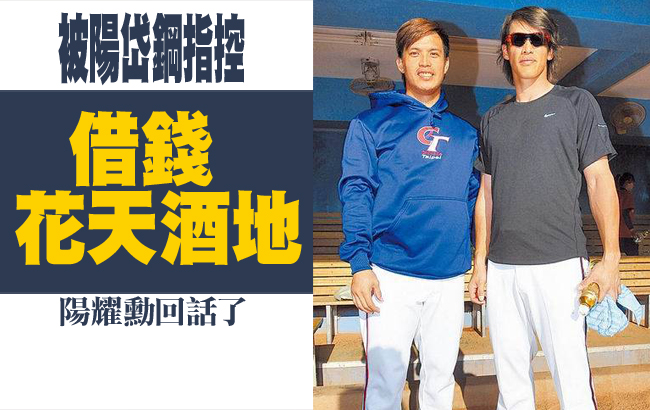

In [8]:
from PIL import Image
Image.open('1.jpg')

## 使用Requests 抓取文字 (POST)

In [9]:
import requests
url = 'https://www.thsrc.com.tw/tw/TimeTable/SearchResult'
payload = {
'StartStation':'977abb69-413a-4ccf-a109-0272c24fd490',
'EndStation':'a7a04c89-900b-4798-95a3-c01c455622f4',
'SearchDate':'2017/11/16',
'SearchTime':'11:00',
'SearchWay':'DepartureInMandarin'
}
res = requests.post(url, data = payload)
res

<Response [200]>

In [13]:
#res.text
type(res)

requests.models.Response

## 台鐵簡易查詢
- http://twtraffic.tra.gov.tw/twrail/EasySearch.aspx

In [56]:
from bs4 import BeautifulSoup 
html_sample = ''' 
<html> 
 <body> 
 <h1 id="title">Hello World</h1> 
 <a href="#" class="link">This is link1</a> 
 <a href="# link2" class="link">This is link2</a> 
 </body> 
 </html>'''

soup = BeautifulSoup(html_sample, 'html.parser')
print(soup.text)




Hello World
This is link1
This is link2




In [57]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [58]:
print(soup.select_one('h1'))
print(soup.select_one('h1').text)

<h1 id="title">Hello World</h1>
Hello World


In [17]:
soup.select_one('a')

<a class="link" href="#">This is link1</a>

In [62]:
print(soup.select_one('a'))

if soup.select_one('a'):
    print('yes')

<a class="link" href="#">This is link1</a>
yes


In [23]:
print(soup.select('qoo'))
print(soup.select('h1'))
print(soup.select('h1')[0])
print(soup.select('h1')[0].text)

[]
[<h1 id="title">Hello World</h1>]
<h1 id="title">Hello World</h1>
Hello World


In [24]:
print(soup.select('a'))

[<a class="link" href="#">This is link1</a>, <a class="link" href="# link2">This is link2</a>]


In [28]:
alinks = soup.select('a')
print(alinks[0])
print(alinks[0].text)
print(alinks[1])
print(alinks[1].text)

<a class="link" href="#">This is link1</a>
This is link1
<a class="link" href="# link2">This is link2</a>
This is link2


In [30]:
for link in alinks:
    #print(link)
    print(link.text)

This is link1
This is link2


In [31]:
# id => #
soup.select('#title')

[<h1 id="title">Hello World</h1>]

In [32]:
# class => .
soup.select('.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [34]:
# body h1 取得body 下的 h1
soup.select('body h1')

[<h1 id="title">Hello World</h1>]

In [35]:
# h1#title : 取得h1標籤且id為title 的資料
soup.select('h1#title')

[<h1 id="title">Hello World</h1>]

In [36]:
# body h1 取得body 下的 h1#title
soup.select('body h1#title')

[<h1 id="title">Hello World</h1>]

In [39]:
# a.link : 取得a標籤且class為link 的資料
soup.select('a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [42]:
for link in soup.select('a.link'):
    print(link)
    print(link.text)
    print(link.get('href'))

<a class="link" href="#">This is link1</a>
This is link1
#
<a class="link" href="# link2">This is link2</a>
This is link2
# link2


## CSS 
- http://www.w3school.com.cn/css/
- https://www.w3schools.com/css/

## 爬蟲實務

In [64]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')
#res.text

In [66]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [76]:
for news in soup.select('.rtddt a'):
    #print(news)
    if news.select_one('h1'):
        title    = news.select('h1')[0].text
        category = news.select('h2')[0].text
        dt       = news.select('time')[0].text
        link     = news['href']
        print(dt, title, category, link)
        print('=============================')

13:04 Gogoro邀約　美國前副總統高爾低調訪... 政治 https://tw.news.appledaily.com/politics/realtime/20171116/1242197/
13:04 2018新北消防猛男月曆出爐　大秀肌肉展... 社會 https://tw.news.appledaily.com/local/realtime/20171116/1242192/
13:01 床照風波未了　議員評劉建國情史續查有無誹... 社會 https://tw.news.appledaily.com/local/realtime/20171116/1242171/
12:58 不服警察威權≠酒駕　法官判鎖車拒檢男免罰... 社會 https://tw.news.appledaily.com/local/realtime/20171116/1242151/
12:57 高雄過港隧道貨櫃車翻覆　撞死對向車道同業(3580) 社會 https://tw.news.appledaily.com/local/realtime/20171116/1242045/
12:56 【亞冠賽】首次進巨蛋　朱俊祥：好漂亮 體育 https://tw.sports.appledaily.com/realtime/20171116/1242189/
12:56 金山分局自製微電影「牛眼睛」　勇奪警界金... 社會 https://tw.news.appledaily.com/local/realtime/20171116/1242183/
12:56 大巨蛋會議記錄全公開竟無錄音檔？北市府：... 生活 https://tw.news.appledaily.com/life/realtime/20171116/1242190/
12:54 【慶富案】外國合約商怎麼看　洛馬：問你們... 政治 https://tw.news.appledaily.com/politics/realtime/20171116/1242112/
12:53 陸官媒：大陸有5種模式「懲戒」台獨(6) 國際 https://tw.news.appledaily.com/international/realtime/20171116/1242172/
12:51 【慶富案】吳敦義：陳偉志進府1次　蔡政府

In [74]:
s = '<a qoo=123 href=# abc=456>link</a>'
soup2 = BeautifulSoup(s, 'html.parser')
soup2.select_one('a')['abc']

'456'

## 抓取內容頁

In [121]:
import requests
res = requests.get('https://tw.news.appledaily.com/politics/realtime/20171116/1242197/')
soup = BeautifulSoup(res.text, 'html.parser')

In [122]:
print(soup.select('h1')[0].text)

【更新】Gogoro邀約　美國前副總統高爾低調訪台


In [94]:
soup.select('.ndArticle_margin p')[0].contents[0]

'電動機車廠商Gogoro今年稍早增資時，美國前副總統高爾創立的一家投資公司曾參與投資，高爾目前正在台灣訪問。外交部證實此訊息，不過僅說高爾訪台純粹商業行為，所以不會與台灣官員見面，也不會安排會見。（何哲欣／台北報導）'

In [99]:
dt = soup.select('.ndArticle_creat')[0].text.split('：')[1]
type(dt)

str

In [100]:
'2017-12-01' - '2017-05-03'

TypeError: unsupported operand type(s) for -: 'str' and 'str'

## 時間格式轉換
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [103]:
from datetime import datetime
current_time = datetime.now()

In [106]:
current_time.strftime('%Y-%m-%d')

'2017-11-16'

In [108]:
s = '2017-11-11 11:11:11'
dt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
print(type(s))
print(type(dt))

<class 'str'>
<class 'datetime.datetime'>


In [110]:
current_time - dt

datetime.timedelta(5, 8896, 307895)

In [113]:
from datetime import timedelta
(current_time - timedelta(days = 20)).strftime('%Y-%m-%d')

'2017-10-27'

In [117]:
for i in range(1,21):
    dt = current_time - timedelta(days = i)
    print(dt.strftime('%Y-%m-%d'))

2017-11-15
2017-11-14
2017-11-13
2017-11-12
2017-11-11
2017-11-10
2017-11-09
2017-11-08
2017-11-07
2017-11-06
2017-11-05
2017-11-04
2017-11-03
2017-11-02
2017-11-01
2017-10-31
2017-10-30
2017-10-29
2017-10-28
2017-10-27


In [119]:
dt = soup.select('.ndArticle_creat')[0].text.split('：')[1]
datetime.strptime(dt, '%Y/%m/%d %H:%M')

datetime.datetime(2017, 11, 16, 13, 4)

In [125]:
int(soup.select('.ndArticle_view')[0].text)

2755

In [129]:
if soup.select_one('.ndArticle_view'):
    print(int(soup.select_one('.ndArticle_view').text))

2755


In [132]:
soup.select('.ndgTag .current')[0].text

'政治'

## 將程式整理到函數之中

In [4]:
def pageDetail(detailurl):
    res = requests.get(detailurl)
    soup = BeautifulSoup(res.text, 'html.parser')    
    # 抓取標題
    title = soup.select('h1')[0].text
    # 抓取摘要
    summary = ' '.join([p.text for p in soup.select('.ndArticle_margin p')]).split('想知道更多')[0].split('發稿時間')[0]
    #print(soup.select('.ndArticle_margin p'))
    # 抓取時間
    dt = soup.select('.ndArticle_creat')[0].text.split('：')[1]
    dt = datetime.strptime(dt, '%Y/%m/%d %H:%M')
    # 抓取點閱數
    clicked = 0
    if soup.select_one('.ndArticle_view'):
        clicked = int(soup.select_one('.ndArticle_view').text)
    # 抓取類別
    category = soup.select('.ndgTag .current')[0].text
    
    return {'title': title, 'summary': summary, \
            'clicked':clicked, 'dt':dt, 'category':category}

In [5]:
pageDetail('https://tw.news.appledaily.com/forum/realtime/20171116/1242064/')

NameError: name 'datetime' is not defined

## 正規表達法

In [159]:
article = 'My phone number is 0912345678 '
'0912345678' in article

True

In [163]:
import re

s = 'o'
print(re.match('o', s))

# []:  可以比對理面任意字元
print(re.match('[abcdefghijklmnopqrstuvwxyz]', s))

# - continuous: 表達連續比對字串 
print(re.match('[a-z]', s))

<_sre.SRE_Match object; span=(0, 1), match='o'>
<_sre.SRE_Match object; span=(0, 1), match='o'>
<_sre.SRE_Match object; span=(0, 1), match='o'>


In [171]:
n = '5'
print(re.match('[0-9]', n))

n = 'G'
print(re.match('[0-9a-zA-Z]', n))

# \d => [0-9]
n = '5'
print(re.match('\d', n))


# \w => [0-9a-zA-Z]
n = 'G'
print(re.match('\w', n))

<_sre.SRE_Match object; span=(0, 1), match='5'>
<_sre.SRE_Match object; span=(0, 1), match='G'>
<_sre.SRE_Match object; span=(0, 1), match='5'>
<_sre.SRE_Match object; span=(0, 1), match='G'>


In [180]:
s = 'Apple'
print(re.match('\w', s))

# {n}: match the number of occurence in string 
print(re.match('\w{5}', s))

# {m,n}: match at least m, at most n
print(re.match('\w{4,6}', s))

# {1,}: match at least 1
print(re.match('\w{1,}', s))

# +: {1,}
print(re.match('\w+', s))

# *: {0,}
print(re.match('\w*', s))

<_sre.SRE_Match object; span=(0, 1), match='A'>
<_sre.SRE_Match object; span=(0, 5), match='Apple'>
<_sre.SRE_Match object; span=(0, 5), match='Apple'>
<_sre.SRE_Match object; span=(0, 5), match='Apple'>
<_sre.SRE_Match object; span=(0, 5), match='Apple'>
<_sre.SRE_Match object; span=(0, 5), match='Apple'>


In [186]:
phones = ['0912345678', '0912-345-678', '0922-333444', '091928309890503480934504934803810930123']
for p in phones:
    #print(p)
    #print(re.match('09\d+', p ))
    #print(re.match('09\d{8}', p ))
    
    #print(re.match('09\d{2}-{0,1}\d{3}-{0,1}\d{3}', p ))
    # ? => {0,1}
    #print(re.match('09\d{2}-?\d{3}-?\d{3}', p ))
    
    # ^: match beginning, $: match end
    print(re.match('^09\d{2}-?\d{3}-?\d{3}$', p ))
    

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
<_sre.SRE_Match object; span=(0, 11), match='0922-333444'>
None


## 民國年月日轉換

In [197]:
roc_ymd = '民國89年2月29日'
import re
m = re.match('民國(\d+)年(\d+)月(\d+)日',roc_ymd)

ymd = '{}/{}/{}'.format(int(m.group(1)) + 1911, m.group(2), m.group(3))
datetime.strptime(ymd, '%Y/%m/%d')

datetime.datetime(2000, 2, 29, 0, 0)

In [158]:
from datetime import datetime
datetime.strptime('2000/2/29', '%Y/%m/%d')

datetime.datetime(2000, 2, 29, 0, 0)

In [202]:
import calendar
calendar.isleap(2000)

True

## 將Python 轉成EXE
- https://pypi.python.org/pypi/py2exe/

## 用Python 做 GUI 介面
- https://riverbankcomputing.com/software/pyqt/intro

## 用Python 做 API
- http://flask.pocoo.org/



## 抓 591 資料

In [207]:
import requests
headers = {
 'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'   
}
res = requests.get('https://rent.591.com.tw/?kind=1&region=1&section=5', headers = headers)
#res.text

## 完成蘋果爬蟲

In [2]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://tw.appledaily.com/new/realtime')
soup = BeautifulSoup(res.text, 'html.parser')

In [3]:
newsary = []
for news in soup.select('.rtddt a'):
    newsary.append(pageDetail(news['href']))

NameError: name 'pageDetail' is not defined

In [215]:
newsary[2]

{'category': '生活',
 'clicked': 45,
 'dt': datetime.datetime(2017, 11, 16, 15, 9),
 'summary': '颱風過後的溪流及出海口總堆滿漂流木，林務局花蓮林區管理處除清理之外，也思考如何讓漂流木重生。去年與台灣漂流木協會共同辦理「桌住愛」活動，將不起眼的漂流木變成書桌後，今年擴大舉辦「漂流木百萬小學堂—部落工藝坊」活動，請來專業老師教導，將不起眼的漂流木變成美麗藝術品。課程邀請花蓮高級工業職業學校製圖科主任謝金威老師、曾永元老師，及花蓮在地原住民木藝師吳乾坤等人為授課講師，並預計於7週內把技藝經驗毫無保留傳授給所有學員，期待每位學員將原住民文化特色，發揮在漂流木製作而成的作品上，同時結合生活中原住民圖騰設計，使作品呈現不同的風貌。\xa0花蓮林管處長楊瑞芬表示，工藝坊原本預計召募10位學員，因報名情形十分踴躍特別加收2位，總共錄取12位有興趣於漂流木工藝的原住民朋友，他們透過木製技術、學習創作等課程，運用現代科技，以3D雷射切割方式加上獨特創作，使漂流木轉化成獨具原民風格的木藝作品。課程結束後，學員共完成24件作品，包含桌、椅及書架，其中幾件則是以結合鐵件及燈飾等方式製作而成，成為兼具現代風的生活木作。另外，部份作品運用雷射切割方式加上獨特創作，使漂流木轉化成獨具原民風格的木藝作品。還有一位阿美族學員為保存傳統技藝，以漂流木製作織布機，不同於一般木作，令人印象深刻。成品將在本月20至26日在花蓮市永豐銀行三樓辦理成果展，歡迎民眾蒞臨參觀。（突發中心黃瑞娟／花蓮報導）',
 'title': '24件原民味漂流木藝術品\u300020日花蓮市開展'}

In [219]:
newsurl = 'https://tw.appledaily.com/new/realtime/{}'
for page in range(1,3):
    print(newsurl.format(page))

https://tw.appledaily.com/new/realtime/1
https://tw.appledaily.com/new/realtime/2


In [220]:
newsurl = 'https://tw.appledaily.com/new/realtime/{}'
newsary = []
for page in range(1,6):
    res = requests.get(newsurl.format(page))
    soup = BeautifulSoup(res.text, 'html.parser')
    for news in soup.select('.rtddt a'):
        newsary.append(pageDetail(news['href']))

In [221]:
len(newsary)

150

## Pandas

In [223]:
import pandas
a = [{'id':1, 'name':'qoo', 'gender': 'M'}, {'id':2, 'name': 'Marry'}]
df = pandas.DataFrame(a)
df

gender  id   name
0      M   1    qoo
1    NaN   2  Marry

In [224]:
newsdf = pandas.DataFrame(newsary)

In [226]:
newsdf.head()

category  clicked                  dt  \
0       社會    53966 2017-11-16 15:21:00   
1       動物        0 2017-11-16 15:21:00   
2       國際        0 2017-11-16 15:21:00   
3       社會        0 2017-11-16 15:19:00   
4       體育     1834 2017-11-16 15:17:00   

                                             summary  \
0  （新增：影片）刑事局3線1星中區督察楊宏麟（55歲），昨晚在台中市北區公園路「動感舞場」突然...   
1  海岸巡防署北部地區巡防局第八海岸巡防總隊永安安檢所，今上午7時35分守望人員監控海面目標，在...   
2  近年來，外媒不時報導中國擁有較東風31更先進的東風41洲際飛彈，但官方至今尚未公開證實，中國...   
3   王姓騎士今年8月30日騎機車行經龜山華亞科技園區，前方一輛貨車準備駛進倉儲區，騎士自摔發生...   
4  (更新：戴資穎晉級女單8強)15:17戴資穎只花33分鐘在女子單打16強以21比18、15，...   

                       title  
0         心臟衰竭　刑事局3線1星督察猝死舞廳  
1         桃園永安漁港北岸　發現江豚擱淺死亡　  
2    《環時》總編：曾目睹東風41飛彈  一枚毀一國  
3        騎士自摔狀告鄰近貨車　貨車司機嘆：無奈  
4  【更新】戴資穎33分鐘速勝　中國羽球公開賽女單晉8

In [229]:
newsdf.sort_values('clicked', ascending=False).head()

category  clicked                  dt  \
21        體育   191242 2017-11-16 14:56:00   
93        娛樂   126780 2017-11-16 13:30:00   
75        體育   109849 2017-11-16 13:50:00   
145       生活    97246 2017-11-16 12:30:00   
102       3C    92760 2017-11-16 13:18:00   

                                               summary  \
21   (新增影片)(新增網友反應)針對弟弟陽岱鋼昨天在臉書發文，指大哥陽耀勳跟太太向週刊爆料，並且...   
93   (新增動新聞、內文和照片)天后張惠妹（阿妹）最近忙著 「烏托邦2.0慶典」世界巡演，今天凌晨...   
75   (新增訪問、影片)亞冠賽台灣隊隊長，效力日職讀賣巨人隊的陽岱鋼，昨天晚上在個人臉書發布聲明，...   
145  （更新：新增配音影片）罹患胰臟癌末期的台灣資深體育主播傅達仁，近來和家人前往瑞士，尋求安樂死...   
102  通信軟體「LINE」日本總公司今日宣布，計畫在12月之後推出「取消送信(傳送)」的功能，過去...   

                           title  
21   【更新】被陽岱鋼指控借錢、花天酒地    陽耀勳回話了  
93    真相曝光！張惠妹刪光臉書36小時後　將做這件事...  
75          【有片】回應家務事風波　陽岱鋼一次講清楚  
145      【有片】傅達仁獲「綠燈」資格　隨時可執行安樂死  
102   【獨家】LINE將新增「取消傳送」功能　錯頻不再尷尬

In [233]:
# groupby and max 使用
newsdf.groupby('category')['clicked'].max().sort_values(ascending=False)

category
體育      191242
娛樂      126780
生活       97246
3C       92760
社會       89781
國際       36008
財經地產     13961
政治        6051
壹週刊       2590
論壇        1669
動物        1643
Name: clicked, dtype: int64

In [238]:
# transform 使用
idx = newsdf.groupby('category')['clicked'].transform(max) == newsdf['clicked']
newsdf[idx]

category  clicked                  dt  \
21        體育   191242 2017-11-16 14:56:00   
23        動物     1643 2017-11-16 14:50:00   
29        社會    89781 2017-11-16 14:45:00   
34        社會    89781 2017-11-16 14:45:00   
54        論壇     1669 2017-11-16 14:23:00   
64      財經地產    13961 2017-11-16 14:16:00   
67        國際    36008 2017-11-16 14:05:00   
93        娛樂   126780 2017-11-16 13:30:00   
102       3C    92760 2017-11-16 13:18:00   
103       政治     6051 2017-11-16 13:18:00   
135      壹週刊     2590 2017-11-16 12:43:00   
145       生活    97246 2017-11-16 12:30:00   

                                               summary  \
21   (新增影片)(新增網友反應)針對弟弟陽岱鋼昨天在臉書發文，指大哥陽耀勳跟太太向週刊爆料，並且...   
23   (更新:獸醫系教授說法)台中市太平區中山路一處加油站，在辦公室外的花圃旁有個鐵籠子，裡面關了...   
29   （更新：新增台中市家暴防治中心與教育局說法）16日凌晨1時許，台中市潭子區驚傳一起父親攜2幼...   
34   （更新：新增台中市家暴防治中心與教育局說法）16日凌晨1時許，台中市潭子區驚傳一起父親攜2幼...   
54   陳宏奇／律師、好立委要相挺協會發言人 安定力量昨天大動作召開記者會，拿一個黃國昌委員從過去就...   
64   日前甫卸任冠德建設、根基營造董事長職務的馬玉山，驚傳辭世，冠德建設甫證實此一消息，稍晚會對外...   
67   北韓一名士兵本周一在兩韓非軍事區（DMZ）投誠，由於他身中多槍，南韓醫師為他進行多次手術搶救...   
93   (新增動新聞、內文和照片)天后張惠妹（阿妹）最近忙著 「烏托邦2.0慶典」世界巡演，今天凌晨...   
102  通信軟體「LINE」日本總公司今日宣布，計畫在12月之後推出「取消送信(傳送)」的功能，過去...   
103  （更新：新增Gogoro說法）電動機車廠商Gogoro今年稍早增資時，美國前副總統高爾創立的...   
135  紫色、金色、白色的小果子上點綴精緻楓紅，一口咬下綠色果子，才發現這是草仔粿。「很像和果子吧，...   
145  （更新：新增配音影片）罹患胰臟癌末期的台灣資深體育主播傅達仁，近來和家人前往瑞士，尋求安樂死...   

                           title  
21   【更新】被陽岱鋼指控借錢、花天酒地    陽耀勳回話了  
23            私養白鼻心觸法　辯「要放生牠不肯走」  
29            疑報復同居人離家　男攜2幼女共赴黃泉  
34            疑報復同居人離家　男攜2幼女共赴黃泉  
54          跌破道德和法律底線的栽贓，終將被識破唾棄  
64            冠德建設創辦人馬玉山辭世　享壽83歲  
67    投誠北韓士兵體內大量寄生蟲　韓醫：行醫20年從沒看過  
93    真相曝光！張惠妹刪光臉書36小時後　將做這件事...  
102   【獨家】LINE將新增「取消傳送」功能　錯頻不再尷尬  
103    【更新】Gogoro邀約　美國前副總統高爾低調訪台  
135         【壹週刊】他返鄉賣台灣和果子　被嗆不能嫁  
145      【有片】傅達仁獲「綠燈」資格　隨時可執行安樂死

In [239]:
newsdf.groupby('category')['clicked'].mean()

category
3C      31288.666667
動物        821.500000
國際       6431.214286
壹週刊      1628.500000
娛樂      17098.666667
政治       1792.916667
生活       7775.428571
社會       8964.980769
論壇       1056.500000
財經地產     2787.500000
體育      35046.777778
Name: clicked, dtype: float64

In [242]:
newsdf.to_excel('appledaily.xlsx')